In [29]:
import numpy as np
import random 
import math
from operator import itemgetter
from numpy import linspace
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer

In [30]:
from numpy import genfromtxt
my_data = genfromtxt('DEXUSUK.csv', delimiter=',')
mean = np.mean(my_data)
min1 = min(my_data)
max1 = max(my_data)
data = my_data/mean

In [31]:
def data_preprocessing(data, window_size):
    mean = []
    sd = []
    data1 = []
    #print(data)
    for each in range(np.shape(data)[0] - window_size + 1):
        data1.append(data[each + window_size - 1])
        mean.append(np.mean(data[each:each + window_size - 1]))
        sd.append(np.var(data[each:each + window_size - 1]))
    return [data1, mean, sd]

In [32]:
data1, mean1, sd1 = data_preprocessing(data, 5)

In [33]:
"""
LMS function used to update weights
"""
def LMS (error, inp, weight, learning_rate = 0.05):
    return weight + (2 * learning_rate * inp * error)

# Training

In [34]:
errors2 = []
weights = [np.random.randn(), np.random.randn(), np.random.randn()]
for each in range(int(np.shape(data1)[0] * 0.8)):
    actual_value = data1[each]
    mean = mean1[each]
    variance = sd1[each]
    out = weights[0] + actual_value + weights[1] * mean + weights[2] * variance
    error = data1[each + 1] - out
    errors2.append(error)
    weights[0] = LMS(error, actual_value, weights[0])
    weights[1] = LMS(error, mean, weights[1])
    weights[2] = LMS(error, variance, weights[2])

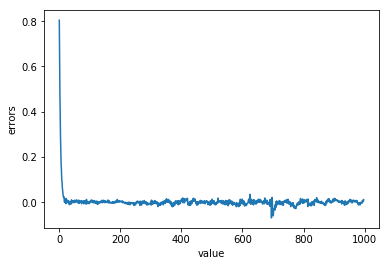

In [35]:
plt.plot(errors2)
plt.ylabel('errors')
plt.xlabel('value')
plt.show()

# Testing

In [36]:
errors = []
for each in range(int(np.shape(data1)[0] * 0.8), np.shape(data1)[0] - 1):
    actual_value = data1[each]
    mean = mean1[each]
    variance = sd1[each]
    out = weights[0] + actual_value + weights[1] * mean + weights[2] * variance
    error = data1[each + 1] - out
    errors.append(error)
    print(mean)

0.898170790589
0.902286890047
0.905042437801
0.908607427709
0.910742977219
0.913963523657
0.92093850391
0.924469049471
0.929618479337
0.932477360132
0.932442915785
0.933235135765
0.932201805357
0.929756256725
0.926742376368
0.925089047716
0.924141828175
0.921489613461
0.918906287441
0.916030184473
0.911380197637
0.907849652076
0.907229653832
0.906230767771
0.906954099056
0.911104642861
0.912310195004
0.911827974147
0.911982973708
0.909864646372
0.908039095984
0.90836631728
0.907350209046
0.908572983362
0.908607427709
0.907005765577
0.908228539893
0.908727982923
0.910036868106
0.909347981168
0.907143542964
0.904801327373
0.902992999159
0.903681886098
0.904818549546
0.904060773914
0.903647441751
0.904629105638
0.90573132474
0.907815207729
0.909761313331
0.910915198953
0.912534083259
0.914497411034
0.916081850993
0.91606462882
0.918561843972
0.921489613461
0.924451827297
0.928481815888
0.928722926317
0.926587376807
0.925330158144
0.923642385144
0.922144056053
0.921127947818
0.919974062196

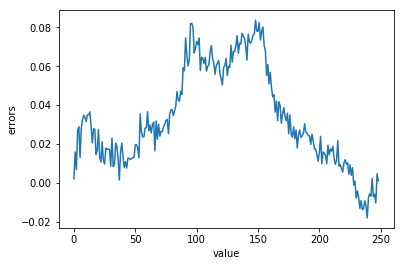

In [37]:
plt.plot(errors)
plt.ylabel('errors')
plt.xlabel('value')
plt.show()

In [27]:
print(mean)

nan
